\begin{table}[H]
\centering
\begin{tabular}{|c|c|c|}
\hline
	$n = 20$ & $m$ & $\sigma$ \\ \hline 
	 & $-3.022 \times 10^{-01} < m < 5.187 \times 10^{-01}$  & $6.670 \times 10^{-01} < \sigma < 1.281 \times 10^{+00}$ \\ \hline
	$n = 100$ & $m$ & $\sigma$ \\ \hline 
	 & $-2.169 \times 10^{-01} < m < 2.277 \times 10^{-01}$  & $9.837 \times 10^{-01} < \sigma < 1.302 \times 10^{+00}$ \\ \hline    
	\end{tabular}
	\caption{caption}
\end{table}
\begin{table}[H]
\centering
\begin{tabular}{|c|c|c|}
\hline
	$n = 20$ & $m$ & $\sigma$ \\ \hline 
	 & $-5.095 \times 10^{-01} < m < 2.377 \times 10^{-01}$  & $6.455 \times 10^{-01} < \sigma < 1.059 \times 10^{+00}$ \\ \hline
	$n = 100$ & $m$ & $\sigma$ \\ \hline 
	 & $-2.224 \times 10^{-01} < m < 1.494 \times 10^{-01}$  & $8.625 \times 10^{-01} < \sigma < 1.034 \times 10^{+00}$ \\ \hline    
	\end{tabular}
	\caption{caption}
\end{table}


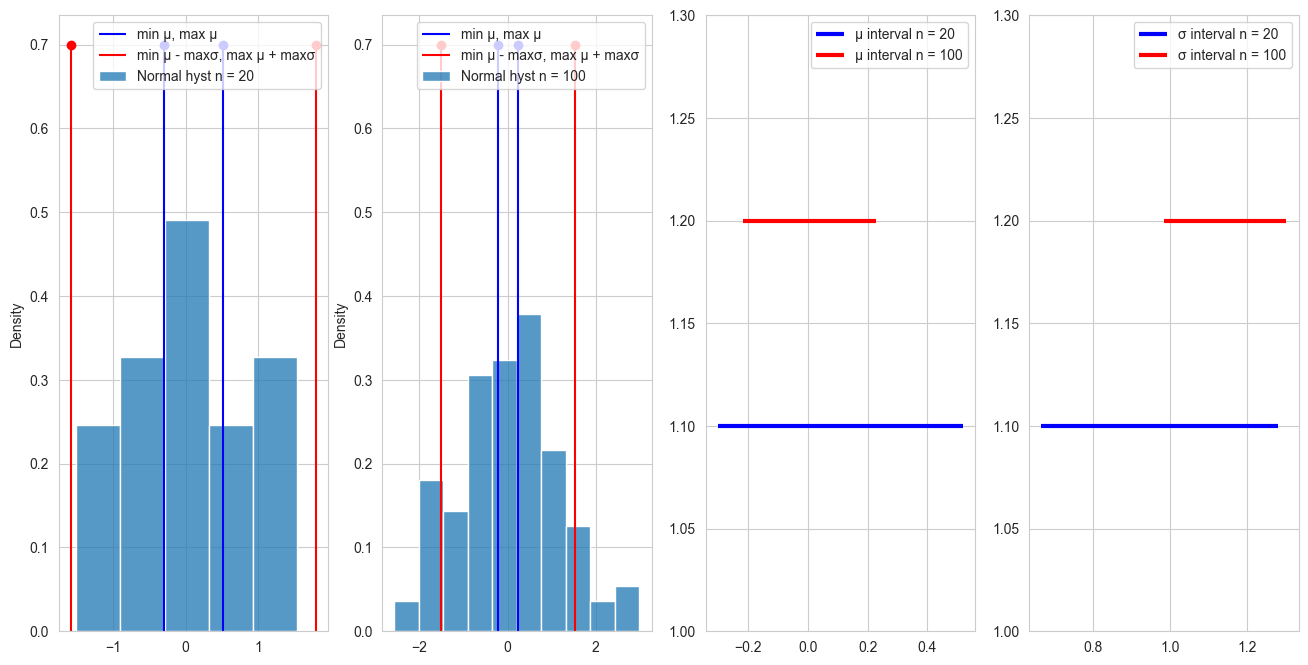

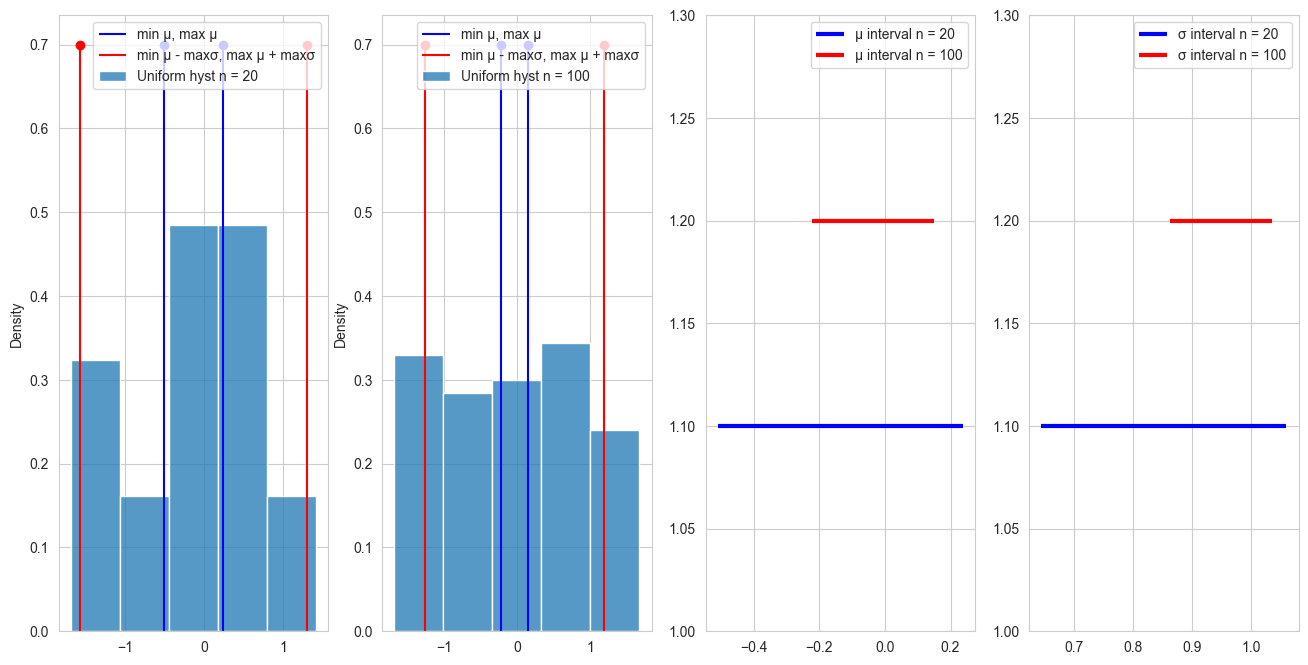

In [3]:
import scipy.stats as sps
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
def convert_in_latex_number(number):
    latex_string = "{:.3e}".format(number)
    latex_string = latex_string.replace('e', r' \times 10^{') + '}'
    return latex_string
def generate_sample(N_range, distribution):
    samples = {}
    for N in N_range:
        sample = np.array(distribution.rvs(size=N))
        samples[N] = sample
    return samples
def calculate_interval_normal_expected_value(sample, confidence_probability):
    n = len(sample)
    accuracy = (sample.var()**0.5 * sps.t((n - 1)).ppf((1 + confidence_probability) / 2)) / (n - 1)**0.5
    return [sample.mean() - accuracy, sample.mean() + accuracy]
def calculate_interval_normal_standard_deviation(sample, confidence_probability):
    n = len(sample)
    return [sample.var()**0.5 * n**0.5 / (sps.chi2(n - 1).ppf((1 + confidence_probability) / 2))**0.5,
            sample.var()**0.5 * n**0.5 / (sps.chi2(n - 1).ppf((1 - confidence_probability) / 2))**0.5]
def calculate_interval_expected_value(sample, confidence_probability):
    n = len(sample)
    accuracy = sample.var()**0.5 * sps.norm.ppf((1 + confidence_probability) / 2) / n ** 0.5
    return [sample.mean() - accuracy, sample.mean() + accuracy]
def calculate_interval_standard_deviation(sample, confidence_probability):
    n = len(sample)
    return [
        sample.var()**0.5 * (1 - (1 / (2 * n**0.5)) *  sps.norm.ppf((1 + confidence_probability) / 2) * (sps.kurtosis(sample) + 2)**0.5),
        sample.var()**0.5 * (1 + (1 / (2 * n**0.5)) *  sps.norm.ppf((1 + confidence_probability) / 2) * (sps.kurtosis(sample) + 2)**0.5)
    ]
def calculate_intervals(samples, distribution, confidence_probability):
    intervals = {}
    for N, sample in samples.items():
        if distribution[1] == "Normal":
            intervals[N] = [calculate_interval_normal_expected_value(sample, confidence_probability),
                            calculate_interval_normal_standard_deviation(sample, confidence_probability)]
        else:
            intervals[N] = [calculate_interval_expected_value(sample, confidence_probability),
                            calculate_interval_standard_deviation(sample, confidence_probability)]
    return intervals
def create_table_intervals(intervals, distribution):
    table = "\\begin{table}[H]\n\centering\n\\begin{tabular}{|c|c|c|}\n\hline"
    for N, interval in intervals.items():
        table += (f"\n\t$n = {N}$ & $m$ & $\sigma$ \\\ \hline \n\t & ${convert_in_latex_number(interval[0][0])} < m < "
                  f"{convert_in_latex_number(interval[0][1])}$  & ${convert_in_latex_number(interval[1][0])} < \sigma < {convert_in_latex_number(interval[1][1])}$ \\\ \hline")
    table += "    \n\t\end{tabular}\n\t\caption{caption}\n\end{table}"
    print(table)
def plot_intervals(samples, intervals, distribution):
    fig, ax = plt.subplots(1, 4, figsize=(16, 8))
    i = 0
    for N, sample in samples.items():
        sns.histplot(data=sample, bins= (int((max(sample) - min(sample)) / 5) + 1) * 5, stat='density', ax=ax[i], label=f"{distribution[1]} hyst n = {N}")
        height_segments = 0.7
        ax[i].vlines(intervals[N][0][0], 0, height_segments, color='b', label='min \u03BC, max \u03BC')
        ax[i].plot(intervals[N][0][0], height_segments, 'bo')
        ax[i].vlines(intervals[N][0][1], 0, height_segments, color='b')
        ax[i].plot(intervals[N][0][1], height_segments, 'bo')

        ax[i].vlines(intervals[N][0][0] - intervals[N][1][1], 0, height_segments, color='r', label='min \u03BC - max\u03C3, max \u03BC + max\u03C3')
        ax[i].plot(intervals[N][0][0] - intervals[N][1][1], height_segments, 'ro')
        ax[i].vlines(intervals[N][0][1] + intervals[N][1][1], 0, height_segments, color='r')
        ax[i].plot(intervals[N][0][1] + intervals[N][1][1], height_segments, 'ro')
        i += 1

    ax[2].hlines(1.1, intervals[20][0][0], intervals[20][0][1], color='b', linewidth=3, label=f'\u03BC interval n = {20}')
    ax[2].hlines(1.2, intervals[100][0][0], intervals[100][0][1], color='r', linewidth=3, label=f'\u03BC interval n = {100}')
    ax[3].hlines(1.1, intervals[20][1][0], intervals[20][1][1], color='b', linewidth=3, label=f'\u03C3 interval n = {20}')
    ax[3].hlines(1.2, intervals[100][1][0], intervals[100][1][1], color='r', linewidth=3, label=f'\u03C3 interval n = {100}')

    ax[2].set_ylim(1, 1.3)
    ax[3].set_ylim(1, 1.3)
    if distribution[1] == "Cauchy":
        ax[0].set_xscale("symlog")
        ax[1].set_xscale("symlog")
        ax[2].set_xscale("symlog")
        ax[3].set_xscale("symlog")

    ax[0].legend(loc='upper right')
    ax[1].legend(loc='upper right')
    ax[2].legend(loc='upper right')
    ax[3].legend(loc='upper right')
    plt.savefig(f"{distribution[1]}_distribution")
distributions = [[sps.norm, "Normal"],
                 [sps.uniform(loc=-3**0.5, scale = 2 * 3**0.5), "Uniform"]
                ]
N_range = [20, 100]
confidence_probability = 0.95
for distribution in distributions:
    samples = generate_sample(N_range, distribution[0])
    intervals = calculate_intervals(samples, distribution, confidence_probability)
    create_table_intervals(intervals, distribution)
    plot_intervals(samples, intervals, distribution)